In [1]:
# Please make sure you have installed scikit-image,matplotlib,pandas 
from skimage.io import imread
import matplotlib.pyplot as plt
import pandas as pd
from util import labeledImage, normalize_coordinates, convert_to_yolo_format
import os, shutil, yaml
from sklearn.model_selection import train_test_split
%load_ext autoreload

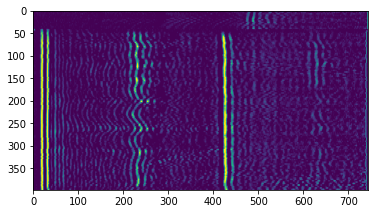

In [2]:
# Load the Sample1.png
# Make sure use the correct path of the image
img1 = imread('./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set/images/Sample1.png')
plt.imshow(img1);

In [3]:
# Load the labels for Sample1.png
# Make sure use the correct path of the label file
label1 = pd.read_table('./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set/labels/Sample1.txt',sep='\s+',index_col=0)
label1

,Xstart,Ystart,Wpixel,Hpixel
Row,,,,
1,215,200,13,61
ROI,92,55,225,332


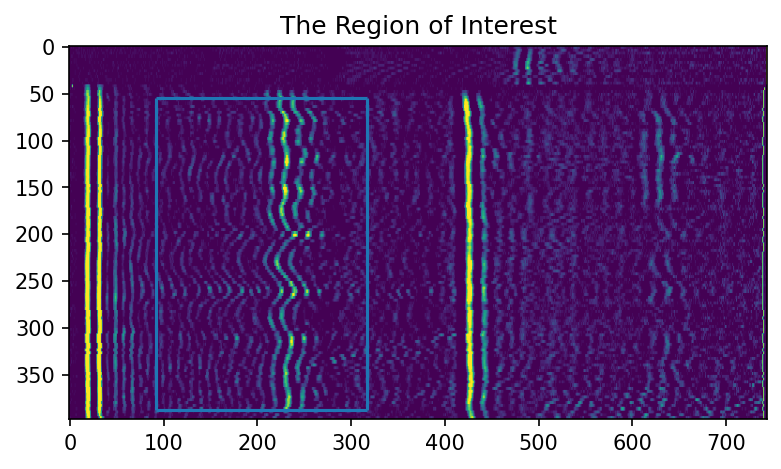

In [4]:
plt.figure(dpi=150)
plt.imshow(img1)
plt.title('The Region of Interest')
plt.vlines((label1['Xstart']['ROI'],label1['Xstart']['ROI']+label1['Wpixel']['ROI']),label1['Ystart']['ROI'],label1['Ystart']['ROI']+label1['Hpixel']['ROI'])
plt.hlines((label1['Ystart']['ROI'],label1['Ystart']['ROI']+label1['Hpixel']['ROI']),label1['Xstart']['ROI'],label1['Xstart']['ROI']+label1['Wpixel']['ROI']);

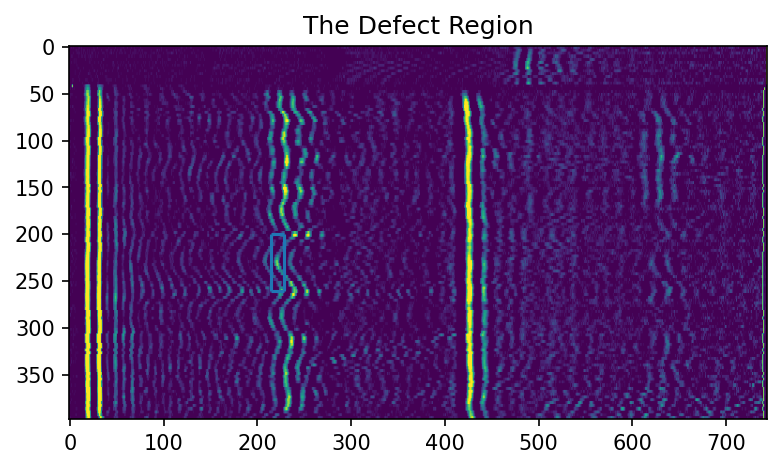

In [5]:
plt.figure(dpi=150)
plt.imshow(img1)
plt.title('The Defect Region')
plt.vlines((label1['Xstart']['1'],label1['Xstart']['1']+label1['Wpixel']['1']),label1['Ystart']['1'],label1['Ystart']['1']+label1['Hpixel']['1'])
plt.hlines((label1['Ystart']['1'],label1['Ystart']['1']+label1['Hpixel']['1']),label1['Xstart']['1'],label1['Xstart']['1']+label1['Wpixel']['1']);

# Data Preparation

In [6]:
path='./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set'
path2='./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_trainset'
path3='./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_testset'
path_val='./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_speedtest'

In [7]:
source_images_dir = [f'{path}/images/',f'{path2}/images/',f'{path3}/images/',f'{path_val}/images/']
source_labels_dir = [f'{path}/labels/',f'{path2}/labels/',f'{path3}/labels/',f'{path_val}/labels/']

In [8]:
labeled_images_train = []
tag_train = ['Defect','ROI'] 
for file in os.listdir(source_images_dir[0]):
    # find all png file and it's label
    if file.endswith(".png"):
        image_path = os.path.join(source_images_dir[0], file)
        label_path = os.path.join(source_labels_dir[0], file.split('.')[0] + '.txt')
        labeled_images_train.append(labeledImage(image_path))
        for i in range(2):
            labeled_images_train[-1].add_labels_from_file(tag_train[i],i,label_path)

In [9]:
labeled_images_train_wt = []
tag_train_wt = 'ROI' 

for file in os.listdir(source_images_dir[1]):
    if file.endswith(".png"):
        image_path = os.path.join(source_images_dir[1], file)
        label_path = os.path.join(source_labels_dir[1], file.split('.')[0] + '.txt')
        labeled_images_train_wt.append(labeledImage(image_path))
        labeled_images_train_wt[-1].add_labels_from_file(tag_train_wt,0, label_path)

In [10]:
labeled_images_val = []
tag_val = 'ROI' 

for file in os.listdir(source_images_dir[2]):
    if file.endswith(".png"):
        image_path = os.path.join(source_images_dir[2], file)
        label_path = os.path.join(source_labels_dir[2], file.split('.')[0] + '.txt')
        labeled_images_val.append(labeledImage(image_path))
        labeled_images_val[-1].add_labels_from_file(tag_val,0, label_path)

In [11]:
labeled_images_test = []
tag_test = 'ROI' 

for file in os.listdir(source_images_dir[3]):
    if file.endswith(".png"):
        image_path = os.path.join(source_images_dir[3], file)
        label_path = os.path.join(source_labels_dir[3], file.split('.')[0] + '.txt')
        labeled_images_test.append(labeledImage(image_path))
        labeled_images_test[-1].add_labels_from_file(tag_test,0, label_path)

In [12]:
print(len(labeled_images_train))
print(len(labeled_images_train_wt))
print(len(labeled_images_test))
print(len(labeled_images_val))

284
800
20
200


In [13]:
for i in range(3):
    print(labeled_images_train[i])

Labeled image Sample1.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set/images/Sample1.png
    shape: (398, 744)
    labels:
    - Defect: 
      [215, 200, 13, 61]
    - ROI: 
      [92, 55, 225, 332]

Labeled image Sample10.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set/images/Sample10.png
    shape: (391, 1128)
    labels:
    - Defect: 
      [214, 128, 12, 51]
    - ROI: 
      [174, 5, 241, 244]

Labeled image Sample100.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_and_measurement_set/images/Sample100.png
    shape: (398, 744)
    labels:
    - Defect: 
      [129, 125, 8, 47]
    - ROI: 
      [99, 50, 190, 244]



In [14]:
for i in range(3):
    print(labeled_images_train_wt[i])

Labeled image Sample1016.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_trainset/images/Sample1016.png
    shape: (391, 849)
    labels:
    - ROI: 
      [0, 387, 0, 0]

Labeled image Sample1018.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_trainset/images/Sample1018.png
    shape: (391, 849)
    labels:
    - ROI: 
      [0, 387, 0, 0]

Labeled image Sample1025.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_trainset/images/Sample1025.png
    shape: (393, 850)
    labels:
    - ROI: 
      [0, 387, 0, 0]



In [15]:
for i in range(3):
    print(labeled_images_test[i])

Labeled image Sample1192.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_speedtest/images/Sample1192.png
    shape: (391, 849)
    labels:
    - ROI: 
      [0, 387, 0, 0]

Labeled image Sample1268.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_speedtest/images/Sample1268.png
    shape: (391, 849)
    labels:
    - ROI: 
      [0, 387, 0, 0]

Labeled image Sample1301.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_speedtest/images/Sample1301.png
    shape: (391, 849)
    labels:
    - ROI: 
      [151, 171, 273, 195]



In [16]:
for i in range(3):
    print(labeled_images_val[i])

Labeled image Sample1020.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_testset/images/Sample1020.png
    shape: (391, 849)
    labels:
    - ROI: 
      [0, 387, 0, 0]

Labeled image Sample1062.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_testset/images/Sample1062.png
    shape: (391, 849)
    labels:
    - ROI: 
      [166, 181, 198, 130]

Labeled image Sample1068.png
    location: ./UW_Boeing_data/UW_Boeing_Hackweek_data/boeing_data_roi_testset/images/Sample1068.png
    shape: (391, 849)
    labels:
    - ROI: 
      [149, 179, 277, 77]



In [17]:
output_dir = os.path.join(os.getcwd(),'data_train_images')
if not os.path.exists(output_dir): os.mkdir(output_dir)

train_dir = os.path.join(output_dir, 'train') 
val_dir   = os.path.join(output_dir, 'val') 
test_dir  = os.path.join(output_dir, 'test') 

# Create the sub-directories
for d in [train_dir, val_dir, test_dir]:
    if not os.path.exists(d): os.mkdir(d)
    
    images_sub_dir = os.path.join(d, 'images')
    labels_sub_dir = os.path.join(d, 'labels')
    
    for sub_dir in [images_sub_dir, labels_sub_dir]:
        if not os.path.exists(sub_dir): os.mkdir(sub_dir)

In [18]:
labeled_images_tot = labeled_images_train+labeled_images_train_wt

In [23]:
tags = ['Defect','ROI']

# zip the dataset
dataset = [(train_dir,labeled_images_tot),(val_dir, labeled_images_val),(test_dir, labeled_images_test)]

for d, s in dataset:
    images_sub_dir = os.path.join(d, 'images')
    labels_sub_dir = os.path.join(d, 'labels')

    # copy over the images
    for img in s:
        shutil.copyfile(img.path, os.path.join(images_sub_dir, img.name))
    
    # covert labels to yolo format and save it to labels_sub_dir
    convert_to_yolo_format(s, labels_sub_dir, tags)

successfully generated labels for image  Sample1.png
successfully generated labels for image  Sample10.png
successfully generated labels for image  Sample100.png
successfully generated labels for image  Sample101.png
successfully generated labels for image  Sample102.png
successfully generated labels for image  Sample103.png
successfully generated labels for image  Sample104.png
successfully generated labels for image  Sample105.png
successfully generated labels for image  Sample106.png
successfully generated labels for image  Sample107.png
successfully generated labels for image  Sample108.png
successfully generated labels for image  Sample109.png
successfully generated labels for image  Sample11.png
successfully generated labels for image  Sample110.png
successfully generated labels for image  Sample111.png
successfully generated labels for image  Sample112.png
successfully generated labels for image  Sample113.png
successfully generated labels for image  Sample114.png
successfully g

successfully generated labels for image  Sample266.png
successfully generated labels for image  Sample267.png
successfully generated labels for image  Sample268.png
successfully generated labels for image  Sample269.png
successfully generated labels for image  Sample27.png
successfully generated labels for image  Sample270.png
successfully generated labels for image  Sample271.png
successfully generated labels for image  Sample272.png
successfully generated labels for image  Sample273.png
successfully generated labels for image  Sample274.png
successfully generated labels for image  Sample275.png
successfully generated labels for image  Sample276.png
successfully generated labels for image  Sample277.png
successfully generated labels for image  Sample278.png
successfully generated labels for image  Sample279.png
successfully generated labels for image  Sample28.png
successfully generated labels for image  Sample280.png
successfully generated labels for image  Sample281.png
successfully

successfully generated labels for image  Sample1638.png
successfully generated labels for image  Sample1645.png
successfully generated labels for image  Sample1651.png
successfully generated labels for image  Sample1656.png
successfully generated labels for image  Sample1666.png
successfully generated labels for image  Sample1667.png
successfully generated labels for image  Sample1673.png
successfully generated labels for image  Sample1674.png
successfully generated labels for image  Sample1676.png
successfully generated labels for image  Sample1690.png
successfully generated labels for image  Sample1691.png
successfully generated labels for image  Sample1695.png
successfully generated labels for image  Sample1706.png
successfully generated labels for image  Sample1708.png
successfully generated labels for image  Sample1729.png
successfully generated labels for image  Sample1736.png
successfully generated labels for image  Sample1737.png
successfully generated labels for image  Sample1

successfully generated labels for image  Sample2799.png
successfully generated labels for image  Sample2800.png
successfully generated labels for image  Sample2810.png
successfully generated labels for image  Sample2849.png
successfully generated labels for image  Sample2868.png
successfully generated labels for image  Sample2870.png
successfully generated labels for image  Sample2874.png
successfully generated labels for image  Sample2877.png
successfully generated labels for image  Sample2893.png
successfully generated labels for image  Sample2894.png
successfully generated labels for image  Sample2895.png
successfully generated labels for image  Sample2898.png
successfully generated labels for image  Sample2906.png
successfully generated labels for image  Sample2913.png
successfully generated labels for image  Sample2925.png
successfully generated labels for image  Sample2928.png
successfully generated labels for image  Sample2934.png
successfully generated labels for image  Sample2

successfully generated labels for image  Sample4052.png
successfully generated labels for image  Sample4063.png
successfully generated labels for image  Sample4066.png
successfully generated labels for image  Sample4068.png
successfully generated labels for image  Sample4072.png
successfully generated labels for image  Sample4108.png
successfully generated labels for image  Sample4111.png
successfully generated labels for image  Sample4115.png
successfully generated labels for image  Sample4120.png
successfully generated labels for image  Sample4123.png
successfully generated labels for image  Sample4126.png
successfully generated labels for image  Sample4146.png
successfully generated labels for image  Sample4149.png
successfully generated labels for image  Sample4152.png
successfully generated labels for image  Sample4156.png
successfully generated labels for image  Sample4162.png
successfully generated labels for image  Sample4164.png
successfully generated labels for image  Sample4

successfully generated labels for image  Sample5452.png
successfully generated labels for image  Sample5455.png
successfully generated labels for image  Sample5456.png
successfully generated labels for image  Sample5457.png
successfully generated labels for image  Sample5459.png
successfully generated labels for image  Sample5465.png
successfully generated labels for image  Sample5479.png
successfully generated labels for image  Sample5499.png
successfully generated labels for image  Sample5517.png
successfully generated labels for image  Sample5518.png
successfully generated labels for image  Sample5522.png
successfully generated labels for image  Sample5524.png
successfully generated labels for image  Sample5532.png
successfully generated labels for image  Sample5534.png
successfully generated labels for image  Sample5544.png
successfully generated labels for image  Sample5551.png
successfully generated labels for image  Sample5564.png
successfully generated labels for image  Sample5

successfully generated labels for image  Sample2667.png
successfully generated labels for image  Sample2700.png
successfully generated labels for image  Sample2756.png
successfully generated labels for image  Sample2764.png
successfully generated labels for image  Sample2803.png
successfully generated labels for image  Sample2808.png
successfully generated labels for image  Sample2835.png
successfully generated labels for image  Sample2912.png
successfully generated labels for image  Sample2924.png
successfully generated labels for image  Sample2967.png
successfully generated labels for image  Sample3006.png
successfully generated labels for image  Sample3032.png
successfully generated labels for image  Sample3046.png
successfully generated labels for image  Sample3056.png
successfully generated labels for image  Sample3122.png
successfully generated labels for image  Sample3160.png
successfully generated labels for image  Sample3266.png
successfully generated labels for image  Sample3

In [24]:
yolo_yaml = os.path.join(output_dir, 'boeing_yolov5.yaml')

with open(yolo_yaml, 'w') as yamlout:
    yaml.dump(
        {'train': train_dir,
         'val': val_dir,
         'nc': len(tags),
         'names': tags},
        yamlout,
        default_flow_style=None,
        sort_keys=False
    )

In [25]:
!tar -cvf data_train_images.tar ./data_train_images

./data_train_images/
./data_train_images/boeing_yolov5.yaml
./data_train_images/test/
./data_train_images/test/images/
./data_train_images/test/images/Sample1192.png
./data_train_images/test/images/Sample1268.png
./data_train_images/test/images/Sample1301.png
./data_train_images/test/images/Sample1801.png
./data_train_images/test/images/Sample1999.png
./data_train_images/test/images/Sample2013.png
./data_train_images/test/images/Sample2114.png
./data_train_images/test/images/Sample2444.png
./data_train_images/test/images/Sample2490.png
./data_train_images/test/images/Sample3001.png
./data_train_images/test/images/Sample3239.png
./data_train_images/test/images/Sample3449.png
./data_train_images/test/images/Sample3860.png
./data_train_images/test/images/Sample4457.png
./data_train_images/test/images/Sample4713.png
./data_train_images/test/images/Sample4805.png
./data_train_images/test/images/Sample4858.png
./data_train_images/test/images/Sample5112.png
./data_train_images/test/images/Sam

./data_train_images/train/images/Sample1531.png
./data_train_images/train/images/Sample1535.png
./data_train_images/train/images/Sample154.png
./data_train_images/train/images/Sample1544.png
./data_train_images/train/images/Sample1545.png
./data_train_images/train/images/Sample155.png
./data_train_images/train/images/Sample1553.png
./data_train_images/train/images/Sample1555.png
./data_train_images/train/images/Sample1558.png
./data_train_images/train/images/Sample156.png
./data_train_images/train/images/Sample1561.png
./data_train_images/train/images/Sample1563.png
./data_train_images/train/images/Sample157.png
./data_train_images/train/images/Sample158.png
./data_train_images/train/images/Sample1581.png
./data_train_images/train/images/Sample1583.png
./data_train_images/train/images/Sample159.png
./data_train_images/train/images/Sample16.png
./data_train_images/train/images/Sample160.png
./data_train_images/train/images/Sample1601.png
./data_train_images/train/images/Sample161.png
./

./data_train_images/train/images/Sample2154.png
./data_train_images/train/images/Sample216.png
./data_train_images/train/images/Sample2161.png
./data_train_images/train/images/Sample2162.png
./data_train_images/train/images/Sample2164.png
./data_train_images/train/images/Sample2168.png
./data_train_images/train/images/Sample217.png
./data_train_images/train/images/Sample2170.png
./data_train_images/train/images/Sample2172.png
./data_train_images/train/images/Sample2176.png
./data_train_images/train/images/Sample218.png
./data_train_images/train/images/Sample2180.png
./data_train_images/train/images/Sample219.png
./data_train_images/train/images/Sample2193.png
./data_train_images/train/images/Sample22.png
./data_train_images/train/images/Sample220.png
./data_train_images/train/images/Sample221.png
./data_train_images/train/images/Sample2211.png
./data_train_images/train/images/Sample2218.png
./data_train_images/train/images/Sample222.png
./data_train_images/train/images/Sample2223.png
.

./data_train_images/train/images/Sample2893.png
./data_train_images/train/images/Sample2894.png
./data_train_images/train/images/Sample2895.png
./data_train_images/train/images/Sample2898.png
./data_train_images/train/images/Sample29.png
./data_train_images/train/images/Sample2906.png
./data_train_images/train/images/Sample2913.png
./data_train_images/train/images/Sample2925.png
./data_train_images/train/images/Sample2928.png
./data_train_images/train/images/Sample2934.png
./data_train_images/train/images/Sample2947.png
./data_train_images/train/images/Sample2949.png
./data_train_images/train/images/Sample2950.png
./data_train_images/train/images/Sample2952.png
./data_train_images/train/images/Sample2977.png
./data_train_images/train/images/Sample2981.png
./data_train_images/train/images/Sample2990.png
./data_train_images/train/images/Sample2993.png
./data_train_images/train/images/Sample2999.png
./data_train_images/train/images/Sample3.png
./data_train_images/train/images/Sample30.png

./data_train_images/train/images/Sample3911.png
./data_train_images/train/images/Sample3922.png
./data_train_images/train/images/Sample3924.png
./data_train_images/train/images/Sample3930.png
./data_train_images/train/images/Sample3934.png
./data_train_images/train/images/Sample3939.png
./data_train_images/train/images/Sample3949.png
./data_train_images/train/images/Sample3951.png
./data_train_images/train/images/Sample3956.png
./data_train_images/train/images/Sample3959.png
./data_train_images/train/images/Sample3967.png
./data_train_images/train/images/Sample3969.png
./data_train_images/train/images/Sample3978.png
./data_train_images/train/images/Sample3992.png
./data_train_images/train/images/Sample3993.png
./data_train_images/train/images/Sample4.png
./data_train_images/train/images/Sample40.png
./data_train_images/train/images/Sample4001.png
./data_train_images/train/images/Sample4022.png
./data_train_images/train/images/Sample4029.png
./data_train_images/train/images/Sample4034.p

./data_train_images/train/images/Sample5043.png
./data_train_images/train/images/Sample5055.png
./data_train_images/train/images/Sample5068.png
./data_train_images/train/images/Sample5077.png
./data_train_images/train/images/Sample51.png
./data_train_images/train/images/Sample5120.png
./data_train_images/train/images/Sample5135.png
./data_train_images/train/images/Sample5137.png
./data_train_images/train/images/Sample5142.png
./data_train_images/train/images/Sample5147.png
./data_train_images/train/images/Sample5165.png
./data_train_images/train/images/Sample5177.png
./data_train_images/train/images/Sample5181.png
./data_train_images/train/images/Sample5183.png
./data_train_images/train/images/Sample5196.png
./data_train_images/train/images/Sample52.png
./data_train_images/train/images/Sample5206.png
./data_train_images/train/images/Sample5215.png
./data_train_images/train/images/Sample5220.png
./data_train_images/train/images/Sample5221.png
./data_train_images/train/images/Sample5224.

./data_train_images/train/images/Sample6179.png
./data_train_images/train/images/Sample6182.png
./data_train_images/train/images/Sample62.png
./data_train_images/train/images/Sample63.png
./data_train_images/train/images/Sample64.png
./data_train_images/train/images/Sample65.png
./data_train_images/train/images/Sample66.png
./data_train_images/train/images/Sample67.png
./data_train_images/train/images/Sample68.png
./data_train_images/train/images/Sample69.png
./data_train_images/train/images/Sample7.png
./data_train_images/train/images/Sample70.png
./data_train_images/train/images/Sample71.png
./data_train_images/train/images/Sample72.png
./data_train_images/train/images/Sample73.png
./data_train_images/train/images/Sample74.png
./data_train_images/train/images/Sample75.png
./data_train_images/train/images/Sample76.png
./data_train_images/train/images/Sample77.png
./data_train_images/train/images/Sample78.png
./data_train_images/train/images/Sample79.png
./data_train_images/train/image

./data_train_images/train/labels/Sample162.txt
./data_train_images/train/labels/Sample163.txt
./data_train_images/train/labels/Sample1632.txt
./data_train_images/train/labels/Sample1638.txt
./data_train_images/train/labels/Sample164.txt
./data_train_images/train/labels/Sample1645.txt
./data_train_images/train/labels/Sample165.txt
./data_train_images/train/labels/Sample1651.txt
./data_train_images/train/labels/Sample1656.txt
./data_train_images/train/labels/Sample166.txt
./data_train_images/train/labels/Sample1666.txt
./data_train_images/train/labels/Sample1667.txt
./data_train_images/train/labels/Sample167.txt
./data_train_images/train/labels/Sample1673.txt
./data_train_images/train/labels/Sample1674.txt
./data_train_images/train/labels/Sample1676.txt
./data_train_images/train/labels/Sample168.txt
./data_train_images/train/labels/Sample169.txt
./data_train_images/train/labels/Sample1690.txt
./data_train_images/train/labels/Sample1691.txt
./data_train_images/train/labels/Sample1695.txt


./data_train_images/train/labels/Sample233.txt
./data_train_images/train/labels/Sample2330.txt
./data_train_images/train/labels/Sample234.txt
./data_train_images/train/labels/Sample235.txt
./data_train_images/train/labels/Sample2355.txt
./data_train_images/train/labels/Sample2359.txt
./data_train_images/train/labels/Sample236.txt
./data_train_images/train/labels/Sample2365.txt
./data_train_images/train/labels/Sample2367.txt
./data_train_images/train/labels/Sample237.txt
./data_train_images/train/labels/Sample238.txt
./data_train_images/train/labels/Sample2389.txt
./data_train_images/train/labels/Sample239.txt
./data_train_images/train/labels/Sample2392.txt
./data_train_images/train/labels/Sample2393.txt
./data_train_images/train/labels/Sample24.txt
./data_train_images/train/labels/Sample240.txt
./data_train_images/train/labels/Sample2405.txt
./data_train_images/train/labels/Sample241.txt
./data_train_images/train/labels/Sample2415.txt
./data_train_images/train/labels/Sample242.txt
./da

./data_train_images/train/labels/Sample3116.txt
./data_train_images/train/labels/Sample3119.txt
./data_train_images/train/labels/Sample3125.txt
./data_train_images/train/labels/Sample3127.txt
./data_train_images/train/labels/Sample3133.txt
./data_train_images/train/labels/Sample3135.txt
./data_train_images/train/labels/Sample3146.txt
./data_train_images/train/labels/Sample3163.txt
./data_train_images/train/labels/Sample3167.txt
./data_train_images/train/labels/Sample3170.txt
./data_train_images/train/labels/Sample3186.txt
./data_train_images/train/labels/Sample3189.txt
./data_train_images/train/labels/Sample3199.txt
./data_train_images/train/labels/Sample32.txt
./data_train_images/train/labels/Sample3201.txt
./data_train_images/train/labels/Sample3206.txt
./data_train_images/train/labels/Sample3208.txt
./data_train_images/train/labels/Sample3212.txt
./data_train_images/train/labels/Sample3215.txt
./data_train_images/train/labels/Sample3223.txt
./data_train_images/train/labels/Sample322

./data_train_images/train/labels/Sample4328.txt
./data_train_images/train/labels/Sample4330.txt
./data_train_images/train/labels/Sample4339.txt
./data_train_images/train/labels/Sample4344.txt
./data_train_images/train/labels/Sample4361.txt
./data_train_images/train/labels/Sample4369.txt
./data_train_images/train/labels/Sample4379.txt
./data_train_images/train/labels/Sample4382.txt
./data_train_images/train/labels/Sample4389.txt
./data_train_images/train/labels/Sample4391.txt
./data_train_images/train/labels/Sample4399.txt
./data_train_images/train/labels/Sample44.txt
./data_train_images/train/labels/Sample4400.txt
./data_train_images/train/labels/Sample4402.txt
./data_train_images/train/labels/Sample4408.txt
./data_train_images/train/labels/Sample4410.txt
./data_train_images/train/labels/Sample4423.txt
./data_train_images/train/labels/Sample4424.txt
./data_train_images/train/labels/Sample4426.txt
./data_train_images/train/labels/Sample4437.txt
./data_train_images/train/labels/Sample444

./data_train_images/train/labels/Sample5524.txt
./data_train_images/train/labels/Sample5532.txt
./data_train_images/train/labels/Sample5534.txt
./data_train_images/train/labels/Sample5544.txt
./data_train_images/train/labels/Sample5551.txt
./data_train_images/train/labels/Sample5564.txt
./data_train_images/train/labels/Sample5569.txt
./data_train_images/train/labels/Sample5571.txt
./data_train_images/train/labels/Sample5590.txt
./data_train_images/train/labels/Sample5594.txt
./data_train_images/train/labels/Sample56.txt
./data_train_images/train/labels/Sample5600.txt
./data_train_images/train/labels/Sample5602.txt
./data_train_images/train/labels/Sample5607.txt
./data_train_images/train/labels/Sample5611.txt
./data_train_images/train/labels/Sample5616.txt
./data_train_images/train/labels/Sample5617.txt
./data_train_images/train/labels/Sample5618.txt
./data_train_images/train/labels/Sample5621.txt
./data_train_images/train/labels/Sample5637.txt
./data_train_images/train/labels/Sample564

./data_train_images/val/images/Sample2124.png
./data_train_images/val/images/Sample2126.png
./data_train_images/val/images/Sample2204.png
./data_train_images/val/images/Sample2222.png
./data_train_images/val/images/Sample2228.png
./data_train_images/val/images/Sample2233.png
./data_train_images/val/images/Sample2241.png
./data_train_images/val/images/Sample2255.png
./data_train_images/val/images/Sample2259.png
./data_train_images/val/images/Sample2274.png
./data_train_images/val/images/Sample2307.png
./data_train_images/val/images/Sample2324.png
./data_train_images/val/images/Sample2326.png
./data_train_images/val/images/Sample2354.png
./data_train_images/val/images/Sample2370.png
./data_train_images/val/images/Sample2372.png
./data_train_images/val/images/Sample2457.png
./data_train_images/val/images/Sample2480.png
./data_train_images/val/images/Sample2495.png
./data_train_images/val/images/Sample2544.png
./data_train_images/val/images/Sample2551.png
./data_train_images/val/images/Sam

./data_train_images/val/labels/Sample2126.txt
./data_train_images/val/labels/Sample2204.txt
./data_train_images/val/labels/Sample2222.txt
./data_train_images/val/labels/Sample2228.txt
./data_train_images/val/labels/Sample2233.txt
./data_train_images/val/labels/Sample2241.txt
./data_train_images/val/labels/Sample2255.txt
./data_train_images/val/labels/Sample2259.txt
./data_train_images/val/labels/Sample2274.txt
./data_train_images/val/labels/Sample2307.txt
./data_train_images/val/labels/Sample2324.txt
./data_train_images/val/labels/Sample2326.txt
./data_train_images/val/labels/Sample2354.txt
./data_train_images/val/labels/Sample2370.txt
./data_train_images/val/labels/Sample2372.txt
./data_train_images/val/labels/Sample2457.txt
./data_train_images/val/labels/Sample2480.txt
./data_train_images/val/labels/Sample2495.txt
./data_train_images/val/labels/Sample2544.txt
./data_train_images/val/labels/Sample2551.txt
./data_train_images/val/labels/Sample2658.txt
./data_train_images/val/labels/Sam